# **CHAPTER02**

### **The face database**
For this homework we will work on face verification (Given a face, say whether it is person A or not). 
Face verification is quite related to face recognition (Given a face, say who it is). Face verification is a 
binary classification task, while face recognition is a multi-class problem. 
Download the file “facedata.mat”. You can load the data by 

In [2]:
import scipy.io 
data = scipy.io.loadmat('facedata.mat') 

Data is a dictionary with key value pairs. The data you want to use can be accessed by using ‘facedata’ as the key. 

In [3]:
# face data is a 2-dimensional array with size 40x10
print(data['facedata'].shape)

(40, 10)


Each data is indexed by $i$ and $j$ where $i$ is the person index $j$ is the index of the pose In other words, there are 40 people in the database. There are 10 images per person. 

In [4]:
print(data['facedata'][0,0])

[[48 46 50 ... 50 54 53]
 [47 47 48 ... 37 46 50]
 [46 48 43 ... 33 41 51]
 ...
 [49 49 50 ... 45 46 47]
 [48 48 49 ... 45 46 46]
 [51 48 50 ... 45 45 46]]


Each image is a 56 by 46 pixels

In [5]:
print(data['facedata'][0,0].shape)

(56, 46)


You can see the image by using the imshow in matplotlib

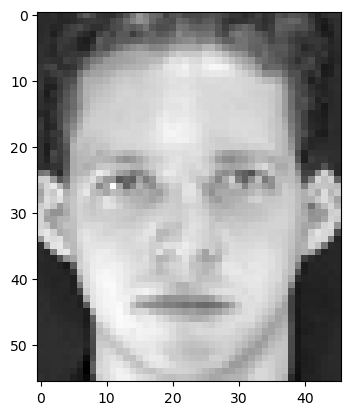

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(data['facedata'][0,0],cmap="gray")
plt.show()

### **Working with images**
Each pixel in an image is usually represented by a 8-bit unsigned integer (values from 0 to 255). In 
order  to  easily  work  on  images,  we  usually  convert  them  to  floats  or  doubles  using  the  following 
command.

In [7]:
from skimage import img_as_float
xf = {}
xf[0,0] = img_as_float(data['facedata'][0,0])
print(xf[0,0])

[[0.18823529 0.18039216 0.19607843 ... 0.19607843 0.21176471 0.20784314]
 [0.18431373 0.18431373 0.18823529 ... 0.14509804 0.18039216 0.19607843]
 [0.18039216 0.18823529 0.16862745 ... 0.12941176 0.16078431 0.2       ]
 ...
 [0.19215686 0.19215686 0.19607843 ... 0.17647059 0.18039216 0.18431373]
 [0.18823529 0.18823529 0.19215686 ... 0.17647059 0.18039216 0.18039216]
 [0.2        0.18823529 0.19607843 ... 0.17647059 0.17647059 0.18039216]]


“img_as_float” scales 0-255 to 0-1. You can still show the image using the same “imshow” command. 

Note that the index of a 2D image starts from the upper left corner of the image. The first dimension 
goes downwards, while the second dimension goes to the right (think of it as a matrix). To understand 
what this means, try the following code.

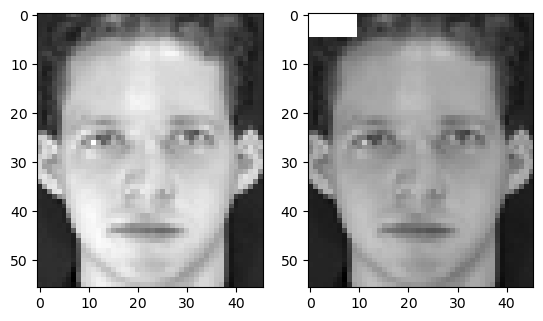

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(xf[0,0],cmap="gray") 
x_temp = xf[0,0].copy() 
x_temp[0:5,0:10] = 1 
# In float format, 1 is white  
ax[1].imshow(x_temp,cmap="gray") 
plt.show()

### **The similarity matrix**
Consider a set of $N$ data points, a similarity matrix $\bold{S}$ is a matrix where $\bold{S}_{i,j}$ is the distance between 
the ith and the jth data point. A similarity  matrix can be very useful for analyzing the data and its 
distribution. Since a similarity matrix can also be considered as an image, you can also show it as an 
image to see the pattern in the data. 
But how do we define similarity? How can we quantify whether image A is closer to B than image C? 
 
One  way  is  to  treat  each  pixel  in  image  as  an  element  in  a  vector  (you  may  find  the  function 
`numpy.reshape()` useful). Then, compare the two vectors using Euclidean distance. 
Euclidean distance between vector 𝑥 and 𝑦 is defined as:
$$D_{Euclidian}=\sqrt{\sum_d(x_d-y_d)^2}$$
where $d$ refers to the index of the dimension.

### 1. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification? Why?

In [9]:
import numpy as np

def euclidean_distance(image1, image2):
    """Calculate the Euclidean distance between two images."""
    return np.sqrt(np.sum((image1 - image2) ** 2))

**Does the numbers make sense?**

This number makes sense because the Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492, and they are images of the same face, while the Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281, and they are images of different faces. The distance between different faces is smaller than between the same face. From the picture below, it can be seen that xf[0,0] and xf[0,1], which are images of the same person but with different head orientations, result in a larger Euclidean distance than the images. xf[0,0] and xf[1,0] even though the images of different people Each is a front image. This results in a smaller Euclidean distance.

**Do you think these numbers will be useful for face verification? Why?**

I think these numbers will be useful for face verification because they indicate the difference between two vectors (in the context of images, it sums up the pixel-wise differences), which can be used to verify faces by showing how similar or different they are. However, there are some important considerations:

1. Threshold distance: This is used to determine whether the faces match or not.
2. Position of the face: If the face positions are different or if the face is turned, the Euclidean distance will increase, even if it is the same person's face.

The euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
The euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


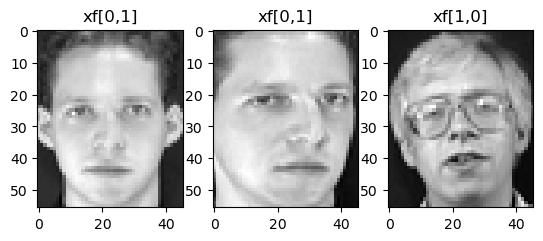

In [10]:
# -- |Define the Dataset Dictionary (xf)| --
# Indices
i, j = np.mgrid[:40, :10]
ind = list(zip(i.reshape(-1),j.reshape(-1)))

# Float image
float_img = [img_as_float(face) for face in data['facedata'].reshape(1,-1)[0]]

xf = dict(zip(ind,float_img))

# -- |Display Calculated EUclidean Distance| --
print(f'The euclidean distance between xf[0,0] and xf[0,1] is {euclidean_distance(xf[0,0],xf[0,1])}')
print(f'The euclidean distance between xf[0,0] and xf[1,0] is {euclidean_distance(xf[0,0],xf[1,0])}')

fig, ax = plt.subplots(1, 3)
ax[0].imshow(xf[0, 0], cmap="gray")
ax[0].set_title("xf[0,1]")

ax[1].imshow(xf[0, 1], cmap="gray")
ax[1].set_title("xf[0,1]")

ax[2].imshow(xf[1, 0], cmap="gray")
ax[2].set_title("xf[1,0]")

plt.show()

As we continue our exercise, we will refine our feature vectors so that the Euclidean distance between two images can be used in a face verification system. We define the similarity matrix, $𝐴$, as a matrix whose elements $𝐴_{𝑖,𝑗}$ is the Euclidean distance between data sample $𝑖$ from list $𝑇$ and data sample $𝑗$ from list $𝐷$, where list $𝑇$, $𝐷$ are lists of data samples. 

### 2. Write a function that takes in a set of feature vectors $T$ and a set of feature vectors $D$, and then output the similarity matrix $A$. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list $𝑇$ (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list $D$ (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat $T$ as our training images and $D$ as our testing images.

In [11]:
def similarity_matrix(T, D):
    """Compute the similarity matrix A given sets of feature vectors T and D."""
    num_T = len(T)
    num_D = len(D)
    A = np.zeros((num_T, num_D))
    for i in range(num_T):
        for j in range(num_D):
            A[i, j] = euclidean_distance(T[i], D[j])
    return A

From the similarity matrix plot, it is evident that the diagonal of the matrix is quite dark (indicating a small Euclidean distance). This is because these represent images of the same person being compared to themselves, such as xf[0,1] compared to xf[0,2]. In other areas, you can observe similarly colored sub-squares, which means those regions contain images of the same person being compared with different people.

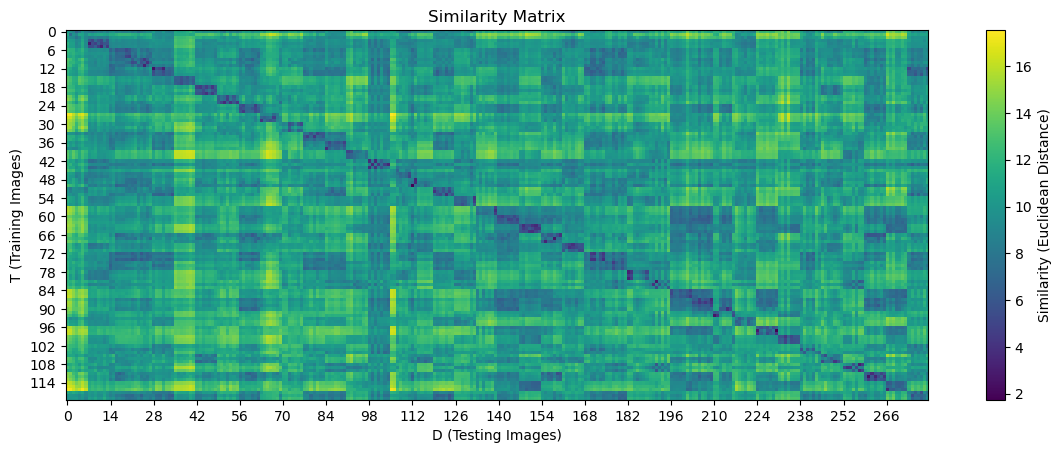

In [12]:
# -- |Train and Test Image Initialization| --
# Train images
i, j = np.mgrid[:40, :3]
T_ind = list(zip(i.reshape(-1),j.reshape(-1)))
T = [xf.get(key) for key in T_ind]
# Test images
i, j = np.mgrid[0:40, 3:10]
D_ind = list(zip(i.reshape(-1),j.reshape(-1)))
D = [xf.get(key) for key in D_ind]

# -- |Similarity Matrix Calculation| --
A = similarity_matrix(T,D)

# -- |Display| --
fig, ax = plt.subplots()
ax.set_xlabel('D (Testing Images)')
ax.set_ylabel('T (Training Images)')
ax.set_xticks(range(0,A.shape[1],14))
ax.set_yticks(range(0,A.shape[0],6))
ax.set_title('Similarity Matrix')

fig.set_figwidth(15)
im = ax.imshow(A)
fig.colorbar(im, orientation='vertical', label='Similarity (Euclidean Distance)')
plt.show()

In our simple face verification system,  given a test image, we want to test if that image comes from 
person A or not. We will compare the test image against the three training images from person A we 
have. If the minimum distance (between the three training images) is below a threshold, 𝑡, we say that 
the test image is person A.

### 3. Write  a  function  that  takes  in  the  similarity  matrix  created  from  the  previous  part,  and  a threshold $t$ as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people). What is the true positive rate and the false alarm rate for $t$ = 10?

In [13]:
def confusion_matrix(TP,FN,FP,TN):
    # -- |Results calculation| --
    accuracy = (TP + TN)/(TP + FP + TN + FN)

    if TP + FP == 0:
        precision = np.NaN
    else:
        precision = TP/(TP + FP)
    
    if TP + FN == 0:
        recall = np.NaN
    else:
        recall = TP/(TP + FN)
        
    f1 = 2*(precision*recall)/(precision + recall)

    # -- |Results display| --
    print('Confusion Matrix')
    print('--------------------------------------')
    print('|            |       Predicted       |')
    print('|            -------------------------   Accuracy  = {0:}'.format(accuracy))
    print('|            |     P     |     N     |')
    print('--------------------------------------   Precision = {0:}'.format(precision))
    print("|        | P |   {0:^5d}   |   {1:^5d}   |   Recall    = {2:}".format(TP, FN, recall))
    print('| Actual -----------------------------')
    print("|        | N |   {0:^5d}   |   {1:^5d}   |   F1-score  = {2:}".format(FP, TN, f1))
    print('--------------------------------------')

    return [accuracy, precision, recall, f1]

In [14]:
def verification_performance(similarity_matrix, threshold):
    """Calculate true positive rate (TPR) and false alarm rate (FAR) given a similarity matrix and threshold."""
    num_people = 40
    train_images = 3
    test_images = 7
    
    TP = 0  # True Positives
    FP = 0  # False Alarms
    TN = 0  # True Negatives
    FN = 0  # False Negatives
    
    for i in range(num_people):
        for j in range(num_people):
            # --|same person as the training images|--
            if j == i:
                for k in range(test_images):
                    if np.min(similarity_matrix[i*train_images:i*train_images+train_images, j*test_images+k]) < threshold:
                        TP += 1
                    else:
                        FN += 1
            # --|different person|--
            else:
                for k in range(test_images):
                    if np.min(similarity_matrix[i*train_images:i*train_images+train_images, j*test_images+k]) < threshold:
                        FP += 1
                    else:
                        TN += 1
    
    return TP, FN, FP, TN

In [15]:
# -- |Hyperparameter| --
t = 10

# -- |Verification Performance| --
TP, FN, FP, TN = verification_performance(A, t)
accuracy, precision, recall, f1 = confusion_matrix(TP, FN, FP, TN)
print('True  positive rate:', TP/(TP + FN))
print('False positive rate:', FP/(FP + TN))

Confusion Matrix
--------------------------------------
|            |       Predicted       |
|            -------------------------   Accuracy  = 0.5549107142857143
|            |     P     |     N     |
--------------------------------------   Precision = 0.053011590347710434
|        | P |    279    |     1     |   Recall    = 0.9964285714285714
| Actual -----------------------------
|        | N |   4984    |   5936    |   F1-score  = 0.10066750856936678
--------------------------------------
True  positive rate: 0.9964285714285714
False positive rate: 0.4564102564102564


**What is the true positive rate and the false alarm rate for $t$ = 10?**

- True  positive rate is 0.9964285714285714
- False positive rate is 0.4564102564102564

### 4. Plot the RoC curve (curve between the true positive  rate  (TP)  as  y-axis  and the false  alarm rate (false positive rate or FP) as x-axis) for this simple verification system when threshold changes. What  should  be the  minimum  threshold  to  generate the RoC  curve?  What  should  be  the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [16]:
def roc_curve(A):
    tol = 0.005
    thresholds = np.linspace(np.min(A),np.max(A),1000)

    # -- |RoC Curve Calculation| --
    TPR = []
    FPR = []
    opt = {}
    for t in thresholds:
        # -- |Verification Performance| --
        TP, FN, FP, TN = verification_performance(A, t)

        # -- |TPR and FPR Calculation| --
        tpr = TP/(TP + FN)
        fpr = FP/(FP + TN)
        TPR.append(tpr)
        FPR.append(fpr)

        if 1 - tol < tpr + fpr and tpr + fpr < 1 + tol:
            opt[t] = (fpr,tpr)

    # -- |Optimal Threshold Performance| --
    t_opt = np.median(list(opt.keys()))
    TP, FN, FP, TN = verification_performance(A, t)

    tpr_opt = TP/(TP + FN)
    fpr_opt = FP/(FP + TN)

    return TPR, FPR, t_opt, tpr_opt, fpr_opt

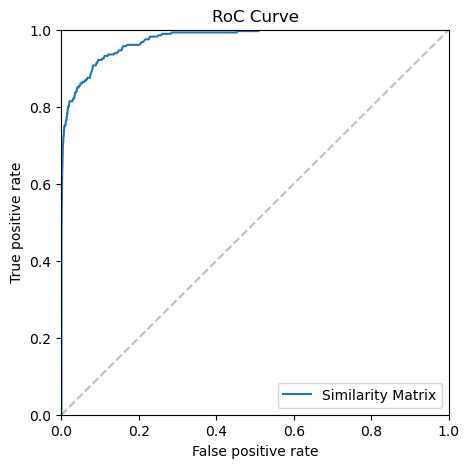

Optimal threshold: 8.091949171960042 ; TPR = 1.0 , FPR = 1.0


In [17]:
# -- |RoC Curve Calculation| --
TPR, FPR, t_opt, tpr_opt, fpr_opt = roc_curve(A)

# -- |RoC Curve Display| --
fig, ax = plt.subplots()
ax.set_title('RoC Curve')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

fig.set_figwidth(5)
fig.set_figheight(5)
ax.plot(FPR,TPR, label='Similarity Matrix')
ax.plot([0,1],[0,1],'--',color='grey',alpha=0.5)
ax.legend()
plt.show()
print('Optimal threshold:', t_opt, '; TPR =', tpr_opt, ', FPR =', fpr_opt)

### **Principle Component Analysis (PCA)**
PCA  is  a  method  for  dimensionality  reduction  that  is  very  flexible  and  fits  many  use  cases.  It  is 
unsupervised (needs no class  label).  The core of PCA  is  using eigendecomposition  to  decompose the 
data into the directions of maximum variance. 

Let’s define a matrix $X$ with each column as an input sample $\vec{x}_i$. 
A typical PCA starts  by normalizing each feature dimension so that they have equal range. For our 
case, since our input vectors are already between 0 and 1, we can skip this step. 
The first step of PCA is to first remove the global mean from our data. Let $\vec{\mu}_x$ be the means of the input 
data along each input dimension. Let $\hat{X}$ be the matrix with the mean of the input samples removed. 
Be sure to use the mean computed from just the training examples. 

### 5. Compute  the  mean  vector  from  the  training  images.  Show  the  vector  as  an  image  (use `numpy.reshape()`). This is typically called the meanface (or meanvoice for speech signals). And plot the meanface by `imshow` command.

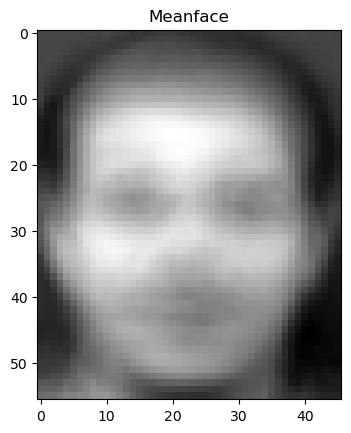

In [18]:
# -- |Meanface Calculation| --
meanface = np.mean(T, axis=0)

#  --|Display the meanface|--
plt.imshow(meanface, cmap='gray')
plt.title('Meanface')
plt.show()

In [19]:
# -- |Remove Meanface from Train set| --
T_hat = (np.array(T) - meanface).reshape((120,-1)).T # matrix T with each column as an input sample
print('Training set shape:',T_hat.shape , '[#feature x #sample]')

Training set shape: (2576, 120) [#feature x #sample]


We can then compute eigenvectors on the covariance matrix computed from  $\hat{X}$. The PCA vectors would 
correspond to the eigenvectors, $\vec{v}$. In other words, $\bold\Sigma\vec{v} = \lambda\vec{v}$. 
However, if we compute the covariance matrix, we would need a lot of space to store it.

### 6. What is the size of the covariance matrix? What is the rank of the covariance matrix? 

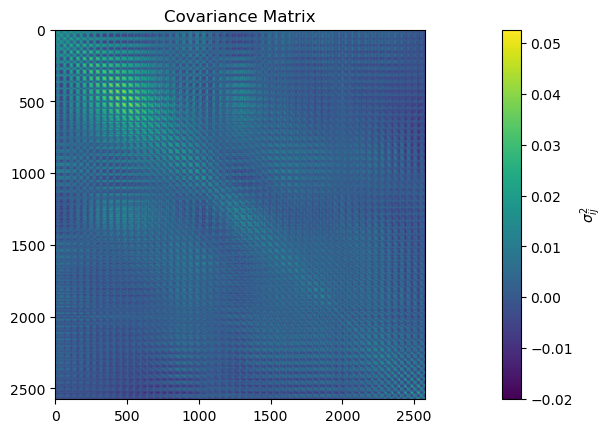

Covariance matrix size: (2576, 2576)
Covariance matrix rank: 119


In [20]:
cov = (T_hat @ T_hat.T)/(T_hat.shape[1])

# -- |Display| --
fig, ax = plt.subplots()
ax.set_title('Covariance Matrix')
fig.set_figwidth(20)
im = ax.imshow(cov)
fig.colorbar(im, orientation='vertical', label='$\sigma^2_{ij}$')
plt.show()

print('Covariance matrix size:', cov.shape)
print('Covariance matrix rank:', np.linalg.matrix_rank(cov))

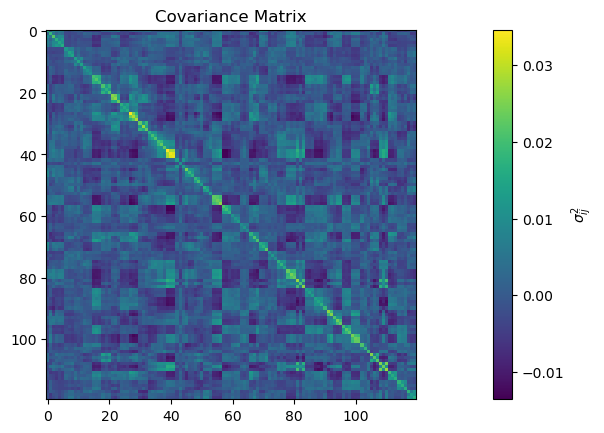

Covariance matrix size: (2576, 2576)
Covariance matrix rank: 119


In [21]:
cov_np = np.cov(T_hat, rowvar=False)

# -- |Display| --
fig, ax = plt.subplots()
ax.set_title('Covariance Matrix')
fig.set_figwidth(20)
im = ax.imshow(cov_np)
fig.colorbar(im, orientation='vertical', label='$\sigma^2_{ij}$')
plt.show()

print('Covariance matrix size:', cov.shape)
print('Covariance matrix rank:', np.linalg.matrix_rank(cov))

**What is the size of the covariance matrix?**

**The covariance matrix size is (2576, 2576)**, corresponding to the total number of features, which is 56 x 46 = 2576. The covariance matrix represents the covariance values between pairs of elements in the vector or variables, so its size is equal to the number of features x number of features.

**What is the rank of the covariance matrix?**

**Covariance matrix rank is 119**. The rank of a sample covariance matrix is the number of linearly independent rows or columns in the matrix and maximum rank of the matrix is N-1 if N = number of samples

The trick is to compute the Gram Matrix ($\hat{X}^T\hat{X}$), which is the inner product between the input matrices.

### 7. What  is  the size  of the Gram  matrix?  What  is  the rank  of Gram  matrix?  If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

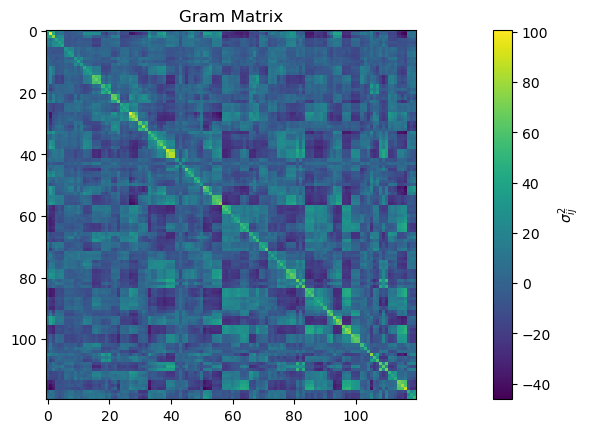

Gram matrix size: (120, 120)
Gram matrix rank: 119
119 non-zero eigenvalues are expected to get


In [22]:
gram = (T_hat.T @ T_hat)

# -- |Display| --
fig, ax = plt.subplots()
ax.set_title('Gram Matrix')
fig.set_figwidth(20)
im = ax.imshow(gram)
fig.colorbar(im, orientation='vertical', label='$\sigma^2_{ij}$')
plt.show()

print('Gram matrix size:', gram.shape)
print('Gram matrix rank:', np.linalg.matrix_rank(gram))
print(f'{np.linalg.matrix_rank(gram)} non-zero eigenvalues are expected to get')

**What is the size of the Gram  matrix?**

**Gram matrix size is (120, 120)**. the Gram matrix provides a way to represent the pairwise relationships between data points in a set (inner product space)

**What is the rank of Gram matrix?**

**Gram matrix rank is 119**. The rank is equal to the number of linearly independent vectors and maximum rank of the matrix is N-1 if N = number of samples

**If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?**

**119 non-zero eigenvalues are expected to get**. The rank of the Gram matrix is 119, then we expect to get 119 non-zero eigenvalues.(non-zero eigenvalues of a matrix is equal to its rank)

### 8. Is the Gram matrix also symmetric? Why? 

Because Gram matrix can also be seen as the inner product of matrix as well as covariance matrix.

Using the gram matrix, we instead solve for the eigenvector, $\vec{v'}$.
$$\hat{X}^T\hat{X}\vec{v'}=\lambda\vec{v'}$$
where  the  desired  eigenvector  (eigenvector  of  the  covariance  matrix)  can  be  computed  from  $\vec{v'}$ 
(eigenvector of the gram matrix) using the following relationship 
$$\vec{v}=\hat{X}\vec{v'}$$
In order to compute the eigenvectors and eigenvalues, we can use the function `numpy.linalg.eigh` 
which can be used on symmetric matrices. For symmetric matrices, the eigenvectors and eigenvalues 
will  always  be  real.  In  contrast,  if  the  matrix  is  not  symmetric,  we  have  to  use  the  function 
`numpy.linalg.eig` which will output complex numbers. 

### 9. Compute the eigenvectors and eigenvalues of the Gram matrix,  $\vec{v'}$ and $\lambda$. Sort the eigenvalues and  eigenvectors  in  descending  order  so  that  the  first  eigenvalue  is  the  highest,  and  the  first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.

We sort the eigenvalues in descending order and arrange the eigenvectors accordingly. We define a "very small value" as any value less than 10**-10. It's noteworthy that there are 119 non-zero eigenvalues.

In [38]:
# -- |Calculate Eigenvalues and Eigenvectors for Gram Matrix| --
gram_eigval, gram_eigvec = np.linalg.eigh(gram)

# -- |Sort in Descendent Order| --
gram_eigval = np.flip(gram_eigval)
gram_eigvec = np.flip(gram_eigvec, axis=1)

eps = 10**-10   # Determine the small number which will be considered as zero
print(f'Number of non-zero eigenvalues: {sum(gram_eigval > eps)}')

Number of non-zero eigenvalues: 119


### 10.  Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues  are  the size  of the variance for each eigenvector direction. If I  want to keep 95%  of the variance in the data, how many eigenvectors should I use?

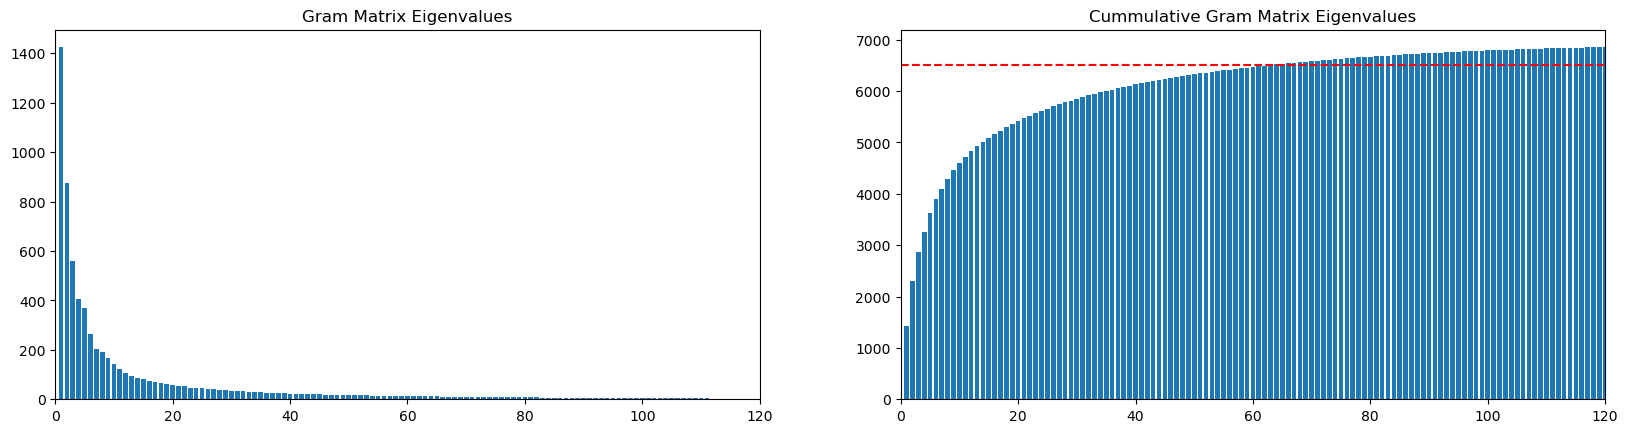

We should use 64 eigenvectors to keep 95% of the data variance


In [39]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)

# -- |Eigenvalues Plot| --
ax[0].set_title('Gram Matrix Eigenvalues')
ax[0].bar(list(range(1, gram_eigval.shape[0]+1)), gram_eigval)
ax[0].set_xlim(0,gram_eigval.shape[0])

# -- |Cummulative Eigenvalues Plot| --
ax[1].set_title('Cummulative Gram Matrix Eigenvalues')
ax[1].bar(list(range(1, gram_eigval.shape[0]+1)), np.cumsum(gram_eigval))
ax[1].axhline(y=0.95*np.sum(gram_eigval), color='red', linestyle='--')
ax[1].set_xlim(0,gram_eigval.shape[0])
plt.show()

# -- |Solve Optimal Amount of Eigenvector| --
cumsum = 0
for i in range(gram_eigval.shape[0]):
    cumsum += gram_eigval[i]
    if cumsum >= 0.95*np.sum(gram_eigval):
        lasted_selected_comp = i
        break

print(f'We should use {i+1} eigenvectors to keep 95% of the data variance')

If we want to keep 95% of the variance in the data, we We should use 64 eigenvectors (Graph cummulative Gram Matrix Eigenvalues)

### 11.  Compute  $\vec{v}$ and  show  the  first  10  eigenvectors  as  images  of  the  original $\vec{v}$ and  $\vec{v}$ taking renormalize  and  show  the  norm  of  each  vector.  Two  example  eigenvectors  are  shown  below.  We  call these images eigenfaces (or eigenvoice for speech signals).

This picture is first 10 eigenface of first  10  eigenvectors 

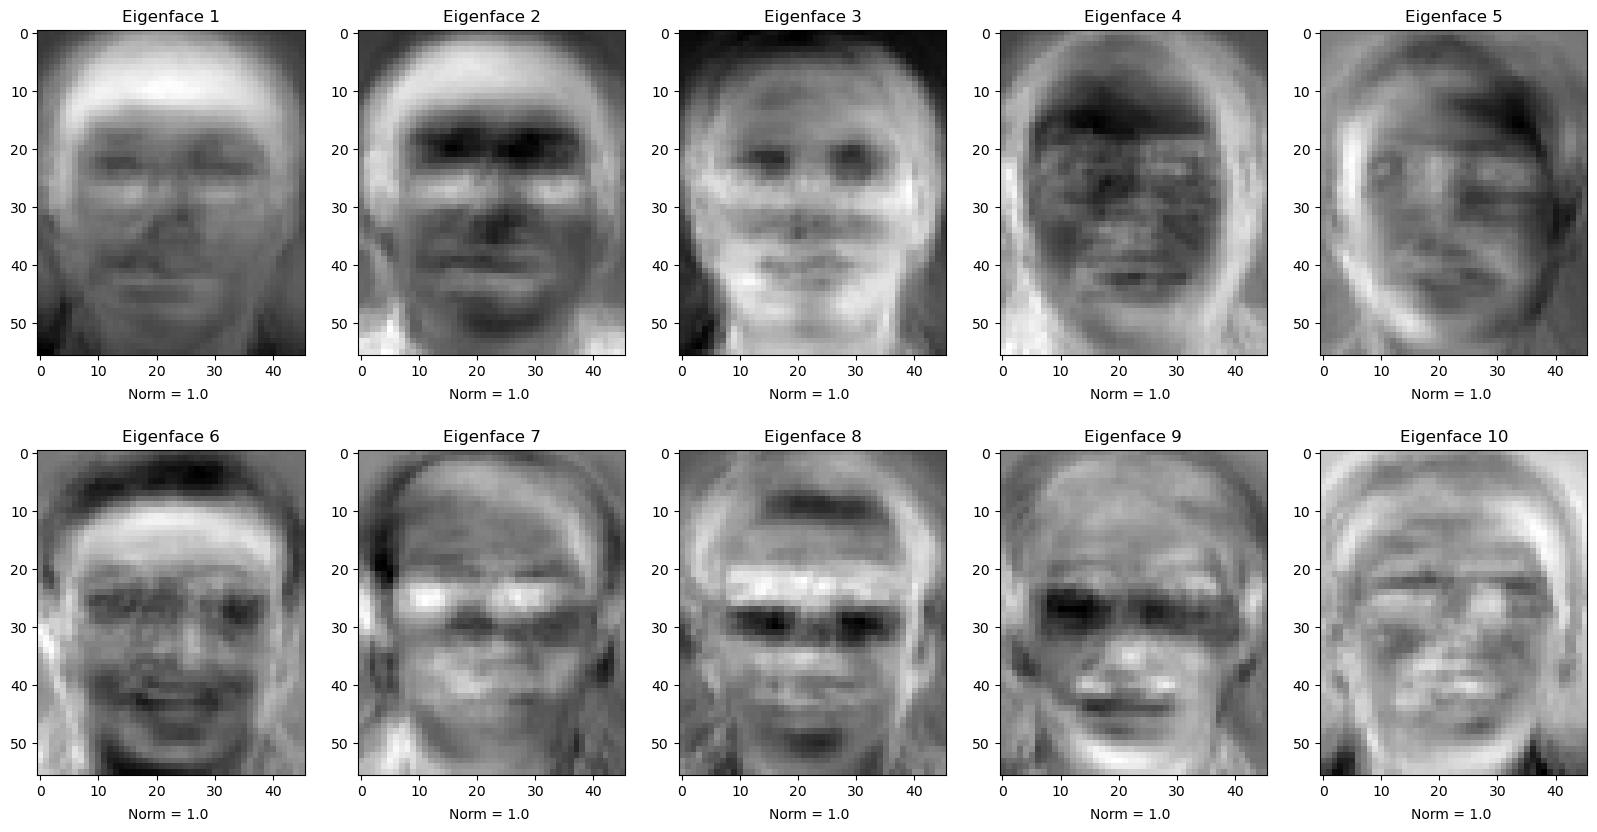

In [41]:
cov_eigvec = T_hat @ gram_eigvec
eigenface = cov_eigvec.T.reshape(-1,56,46)

# -- |Renormalization| --
eigenface = np.array([face/np.linalg.norm(face) for face in eigenface])
cov_eigvec = eigenface.reshape(120,-1).T

eigenface_norm = np.array([np.linalg.norm(face) for face in eigenface])

# -- |Eigenface Display| --
ny = 2
nx = 5
fig, ax = plt.subplots(ny,nx)
fig.set_figwidth(nx*4)
fig.set_figheight(ny*5)
ax = ax.reshape(-1)
for i in range(nx*ny):
    ax[i].imshow(eigenface[i],cmap='gray')
    ax[i].set_title(f'Eigenface {i+1}')
    ax[i].text(22, 63, f'Norm = {eigenface_norm[i]:.5}', fontsize=10, horizontalalignment='center')
plt.show()

### 12.  From  the  image,  what  do  you  think  the  first  eigenvector  captures?  What  about  the  second eigenvector?  Look  at  the  original  images,  do  you  think  biggest  variance  are  capture  in  these  two eigenvectors?

Each eigenface captures different features of the faces in the dataset.

**First Eigenvector (Eigenface 1)**:

The first eigenvector captures the most significant features that are common across all face images in the dataset. The first eigenvector represent a general, average face shape, structure and basic layout of the face (eyes, nose, mouth, hair and some contour of the face)

**Second Eigenvector (Eigenface 2)**:

The second eigenvector captures features that are significant but orthogonal to the first eigenvector.The second eigenvector represents variations that are not captured by the first eigenvector such as shadows, cheekbones or the depth of the eye sockets.

**Look at the original images, do you think biggest variance are capture in these two eigenvectors?**:

I think that the biggest variance is captured in these two eigenvectors because the first eigenvector represents a general, average face shape, encompassing the overall facial structure. Meanwhile, the second eigenvector represents details such as shadows, cheekbones, or the depth of the eye sockets. Therefore, it is probable that the first two eigenvectors (Eigenfaces 1 and 2) capture the major structural and detailed features, which contribute to the largest variances in the dataset.

### **PCA subspace and the face verification system** 
These eigenfaces we computed serve as good directions to project our data onto in order to decrease 
the number of dimensions. Since we have shown in class that these eigenvectors are orthogonal (and 
we normalized them so that they are orthonormal), we can find the projection, $\vec{p}$, of the data onto the 
eigenface subspace by 
$$\vec{p}=V^T(\vec{x}-\vec{\mu}_x)$$
where $V$ is a matrix whose columns are the eigenvectors, $\vec{v}$. The projection values, $\vec{p}$, will serve as 
our new input features.

### 13.  Find the projection values  of all  images.  Keep the first  k =  10 projection values.  Repeat the simple  face  verification  system  (like  item  5  in  CHAPTER02)  we  did  earlier  using  these  projected values.

In [50]:
k = 10
V = cov_eigvec[:,:k]

P = V.T @ (np.array(float_img) - meanface).reshape(400,-1).T
P

array([[ 2.95088713,  5.89924863,  5.31185645, ...,  1.41360023,
         2.58388358,  0.99073862],
       [-2.40979293, -2.03908485, -1.31984747, ..., -2.58941775,
        -2.5235349 , -1.39380989],
       [ 3.97983635,  0.14353644,  2.10885717, ..., -3.08083288,
        -0.84384047, -3.63211305],
       ...,
       [-1.26008371, -0.95616814, -0.43550827, ...,  0.74883861,
        -0.94908292,  1.00320743],
       [ 2.18658004,  0.28274693,  2.34181995, ...,  1.3150185 ,
        -0.51622534,  0.83645465],
       [-0.80350205, -0.65054125, -0.11706622, ...,  0.59489127,
        -0.61121792,  0.13275747]])

One of the  usage  for  PCA  is  compression.  Using  the  project values,  we  can  reconstruct  the  original 
image. This can be done by 
$$\vec{x'}=\vec{\mu}_x+V\vec{p}$$
where $\vec{x'}$ is the reconstructed image. 
We can compute the error from such reconstruction by computing the Mean Square Error (MSE) 
$$MSE=\sum^N_{i=1}\frac{1}{N}(x_i-x'_i)^2$$
where $N$ is the dimension of the original input.

### 14.  Reconstruct the first image using this procedure. Use k = 10, what is the MSE?

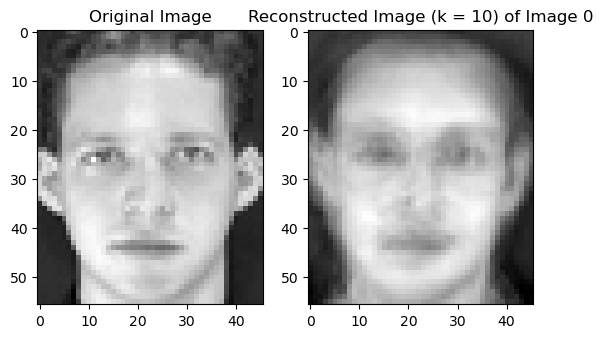

MSE = 0.006148335016488304


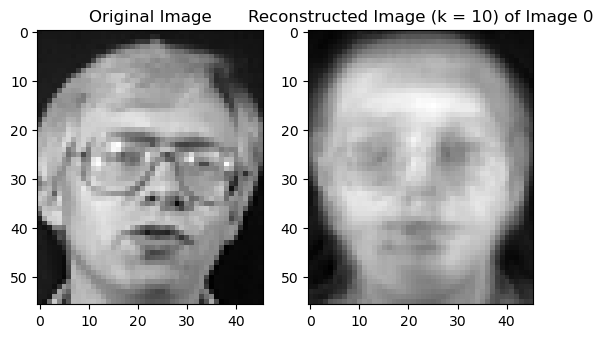

MSE = 0.008706830684788128


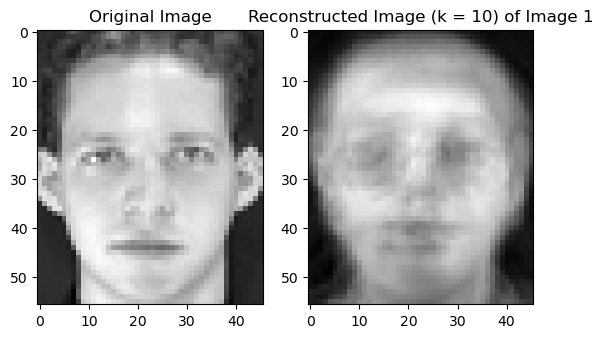

MSE = 0.017456106971960483


In [51]:
x_rec_0 = V @ P[:,0] + meanface.reshape(-1)
x_rec_0 = x_rec_0.reshape(56,46)

x_rec_1 = V @ P[:,10] + meanface.reshape(-1)
x_rec_1 = x_rec_1.reshape(56,46)

fig, ax = plt.subplots(1,2)
ax[0].imshow(xf[0, 0], cmap="gray")
ax[0].set_title('Original Image')

ax[1].imshow(x_rec_0, cmap="gray")
ax[1].set_title(f'Reconstructed Image (k = {k}) of Image 0')
plt.show()

MSE_0 = np.sum((xf[0,0] - x_rec_0)**2)/(xf[0,0].shape[0] * xf[0,0].shape[1])
print('MSE =', MSE_0)

fig, ax = plt.subplots(1,2)
ax[0].imshow(xf[1, 5], cmap="gray")
ax[0].set_title('Original Image')

ax[1].imshow(x_rec_1, cmap="gray")
ax[1].set_title(f'Reconstructed Image (k = {k}) of Image 0')
plt.show()

MSE_01 = np.sum((xf[1,0] - x_rec_1)**2)/(xf[1,0].shape[0] * xf[1,0].shape[1])
print('MSE =', MSE_01)

fig, ax = plt.subplots(1,2)
ax[0].imshow(xf[0, 0], cmap="gray")
ax[0].set_title('Original Image')

ax[1].imshow(x_rec_1, cmap="gray")
ax[1].set_title(f'Reconstructed Image (k = {k}) of Image 1')
plt.show()

MSE_1 = np.sum((xf[0,0] - x_rec_1)**2)/(xf[0,0].shape[0] * xf[0,0].shape[1])
print('MSE =', MSE_1)

It can be seen that when calculating the MSE between the original image of person 1 and the reconstructed image (k=10) of person 1, the MSE is 0.0061483. When comparing the original image of person 2 with the reconstructed image (k=10) of person 2, the MSE is 0.0087068. However, when comparing the original image of person 1 with the reconstructed image (k=10) of person 2, the MSE is 0.0174561. This demonstrates that the MSE is significantly lower when comparing the original image with its own reconstructed version, compared to comparing the original image with the reconstructed version of someone else.

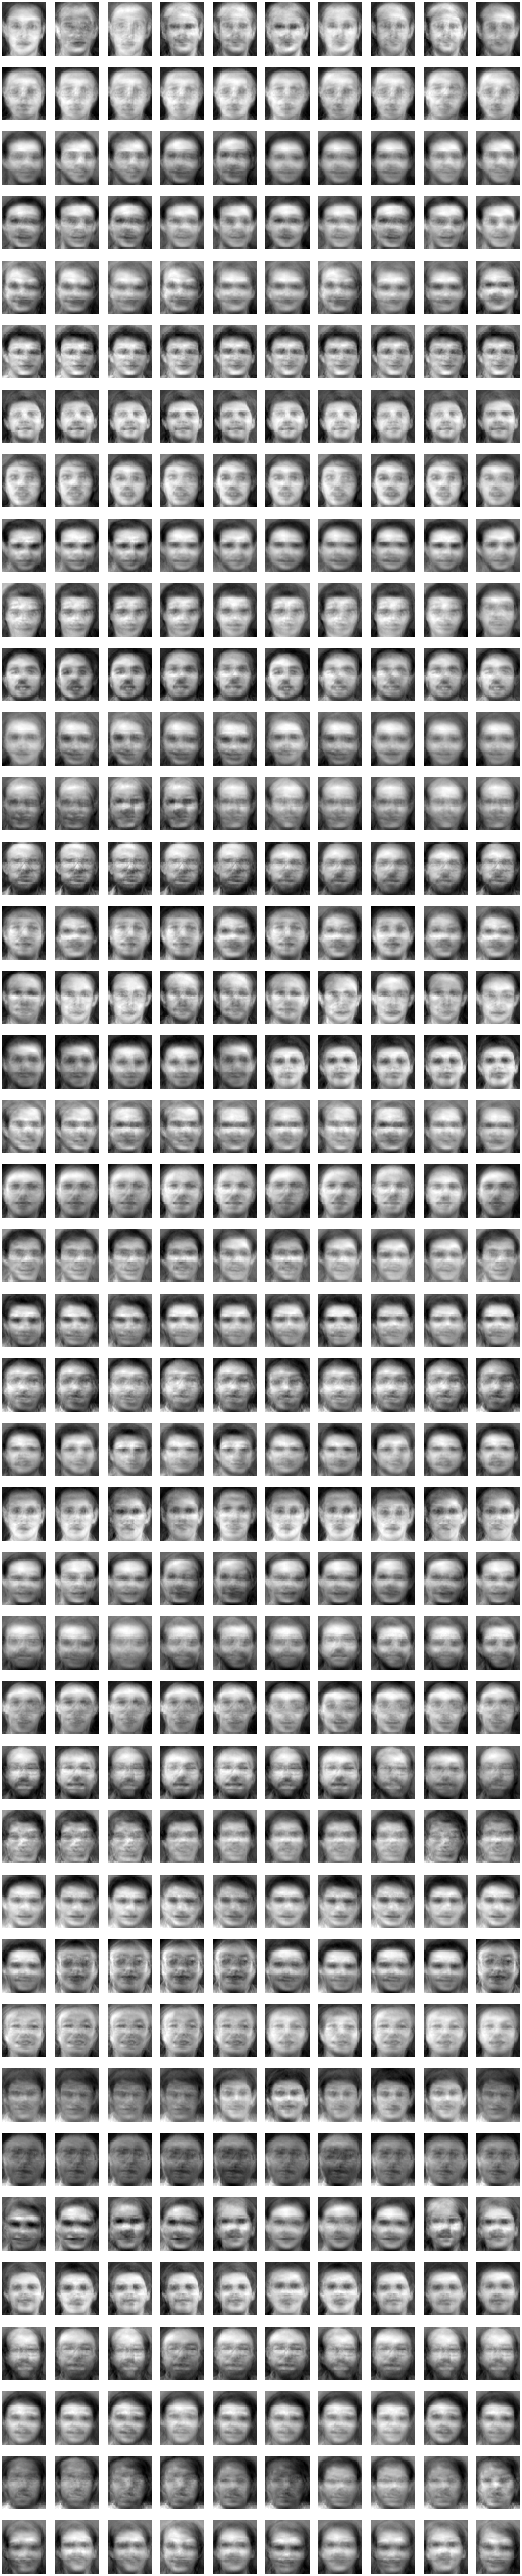

In [52]:
plt.figure(figsize=(30, 150))
for i in range(400):
    x_rec = V @ P[:,i] + meanface.reshape(-1)
    x_rec = x_rec.reshape(56,46)
    plt.subplot(40, 10, i + 1)
    plt.imshow(x_rec, cmap='gray')
    plt.axis('off')
plt.show()